## Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.

### Data Description

The attributes of this data set include:


1. User attributes
    - <font color=FFA533>Gender</font>: male, female
    - <font color=FFA533>Age</font>: below 21, 21 to 25, 26 to 30, etc.
    - <font color=FFA533>Marital Status</font>: single, married partner, unmarried partner, or widowed
    - <font color=FFA533>Number of children</font>: 0, 1, or more than 1
    - <font color=FFA533>Education</font>: high school, bachelors degree, associates degree, or graduate degree
    - <font color=FFA533>Occupation</font>: architecture & engineering, business & financial, etc.
    - <font color=FFA533>Annual income</font>: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    - <font color=FFA533>Car</font>: not specific
    - <font color=FFA533>Bar</font>: number of times that he/she goes to a bar **{value: 0, less than 1, 1 to 3, 4 to 8 or greater than 8}**
    - <font color=FFA533>CoffeeHouse</font>: number of times that he/she goes to a coffee house **{value: 0, less than 1, 1 to 3, 4 to 8 or greater than 8}**
    - <font color=FFA533>CarryAway</font>: number of times that he/she buys takeaway food **{value: 0, less than 1, 1 to 3, 4 to 8 or greater than 8}**
    - <font color=FFA533>Restaurant20To50</font>: number of times that he/she eats at a restaurant with average expense less than \\$20 per person **{value: 0, less than 1, 1 to 3, 4 to 8 or greater than 8}**
 
 ---
 2. Contextual attributes
    - <font color=FFA533>Destination</font>: driving destination **{value: Home, Work, or No Urgent Place}**
    - <font color=FFA533>Passanger</font>: who are the passengers in the car? **{value: Alone, Friend(s), Kid(s), or Partner}**
    - <font color=FFA533>Weather</font>: **{value: Sunny, Rainy, or Snowy}**
    - <font color=FFA533>Temperature</font>: **{value: 30F, 55F, or 80F}**
    - <font color=FFA533>Time</font>: **{value: 10AM, 2PM, or 6PM}**

    Location of user, coupon and destination: we provide a map to show the geographical location of the user, destination, and the venue, and we mark the distance between each two places with time of driving. The user can see whether the venue is in the same direction as the destination.

    - <font color=FFA533>toCoupon_GEQ5min</font>: driving distance to the restaurant/bar for using the coupon is greater than 5 minutes
    - <font color=FFA533>toCoupon_GEQ15min</font>: driving distance to the restaurant/bar for using the coupon is greater than 15 minutes
    - <font color=FFA533>toCoupon_GEQ25min</font>: driving distance to the restaurant/bar for using the coupon is greater than 25 minutes
    - <font color=FFA533>direction_same</font>: whether the restaurant/bar is in the same direction as your current destination
    - <font color=FFA533>direction_opp</font>: whether the restaurant/bar is in the same direction as your current destination

---
3. Coupon attributes
    - <font color=FFA533>Coupon</font>: five types of coupons bars, takeaway food restaurants, coffee houses, cheap restaurants, expensive restaurants **{value: Restaurant(<$20), Coffee House, Carry out & Take away, Bar, Restaurant($20-$50)}**
    - <font color=FFA533>Expiration</font>: time before it expires **{value: 2 hours or one day}**

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
import pandas as pd
import numpy as np
import time as time
import warnings

### Problems

Use the prompts below to get started with your data analysis.

#### 1. Read in the `coupons.csv` file.

In [2]:
data = pd.read_csv('data/coupons.csv')
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


#### 2. Investigate the dataset for missing or problematic data.

##### 2-1 Missing data (NULL)
Show the percentage of missing values for each feature.

In [3]:
df_missing = pd.DataFrame(zip(data.columns,np.zeros(data.columns.shape[0]),np.zeros(data.columns.shape[0])),
                            columns=["Features","Null Count","Percentage(%)"])

# count the number of missing data
for i in range(data.columns.shape[0]):
    df_missing.loc[i,"Null Count"] = data[data.columns[i]].isna().sum()

# calcuate the percentage of missing data
df_missing["Percentage(%)"] = (100*df_missing["Null Count"]/data.shape[0]).round(1)
df_missing["Null Count"] = df_missing["Null Count"].astype(int)

# display only the features that have missing data
df_missing = df_missing.set_index("Features")
df_missing[df_missing["Null Count"]>0]

,Null Count,Percentage(%)
Features,,
car,12576,99.1
Bar,107,0.8
CoffeeHouse,217,1.7
CarryAway,151,1.2
RestaurantLessThan20,130,1.0
Restaurant20To50,189,1.5


In [4]:
# pre-allocation
n_size = 1000
df_entities = pd.DataFrame(zip([""]*n_size,[""]*n_size,np.zeros(n_size),np.zeros(n_size)),\
    columns = ["features","entities","counts","percentage"])
idx = [-1]

for col in data.columns:
    tmp = data.groupby(col).size().reset_index()
    tmp.columns = ["entities","counts"]
    idx = np.arange(idx[-1]+1,idx[-1]+1+tmp.shape[0])
    df_entities.loc[idx,"features"] = col
    df_entities.loc[idx,"entities"] = tmp["entities"].to_list()
    df_entities.loc[idx,"counts"] = tmp["counts"].to_list()
    df_entities.loc[idx,"percentage"] = 100*((tmp["counts"].to_list())/((~data[col].isna()).sum())).round(3)

df_entities = df_entities.drop(labels=np.arange(idx[-1]+1,n_size),axis=0)
df_entities = df_entities.sort_values(by="percentage").reset_index(drop=True)

# display feature that contains one specific value greater than 60%
df_entities[df_entities['percentage']>60]

,features,entities,counts,percentage
118,direction_same,0,9960.0,78.5
119,direction_opp,1,9960.0,78.5
120,weather,Sunny,10069.0,79.4
121,toCoupon_GEQ25min,0,11173.0,88.1
122,toCoupon_GEQ5min,1,12684.0,100.0


In [5]:
# display feature that contains one specific value less than 1%
df_entities[df_entities['percentage']<1]

,features,entities,counts,percentage
0,occupation,Building & Grounds Cleaning & Maintenance,44.0,0.3
1,occupation,Farming Fishing & Forestry,43.0,0.3
2,education,Some High School,88.0,0.7
3,occupation,Production Occupations,110.0,0.9


#### 3. Decide what to do about your missing data -- drop, replace, other...

Most of the features do not have any missing values. In this section, I will drop any feature or observations if the information are not representable due to large amount of missing value or contain large amount of same information.

- drop "car" column (about 99.1% missing data)
- drop "toCoupon_GEQ5min" column (100% of place is over 5 miles radius)
- drop any rows with missing value (about 4.77% records being remove)

In [6]:
df = data

# Drop "car" column (about 99.1% missing data)
df = df.drop(columns="car")

# Drop "toCoupon_GEQ5min" column (100% of place is within 5 miles)
df = df.drop(columns="toCoupon_GEQ5min")

# Drop any rows with missing value (about 4.77% records being remove)
df = df.dropna()

# reset index
df = df.reset_index()
df = df.drop(columns='index')

print('About %.2f%% observations being removed' %(100*(1-(df.shape[0]/data.shape[0]))))

About 4.77% observations being removed


#### 4. What proportion of the total observations chose to accept the coupon?

Within 12,079 total observations, about **<font color=#66b3ff>56.9%</font>** of drivers will accepted the coupon, and about **<font color=#ff9999>43.1%</font>** of drivers will NOT accepted the coupon.

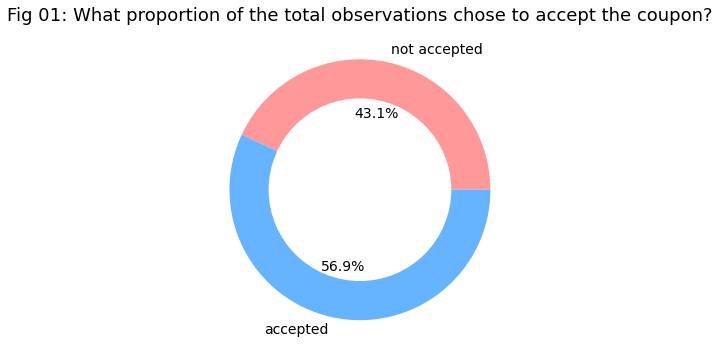

In [7]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

fig_01 = plt.figure(figsize=(8,6),facecolor="white")
df.groupby("Y").size().plot.pie(\
    labels=["not accepted", "accepted"],
    autopct="%1.1f%%",
    colors=colors,
    fontsize=14)
plt.title("Fig 01: What proportion of the total observations chose to accept the coupon?",fontsize=18)
plt.ylabel("")
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))
plt.show()

#### 5. Use a bar plot to visualize the `coupon` column.

According to the proportional bar plot, the drivers are more willing to accept takeaway and cheap restaurant coupons (**<font color=#66b3ff>>70%</font>**). This makes sense because

1. **Convenience & Instant Discount**

    Since the coupons are delivered to your phone while you are driving, take-out food restaurants are the easiest and most convenient for you to get this discount in the least amount of time.

2. **Direct application to what you need**

    Most driver who are going to expensive restaurants are more interested in good food than the cost of the food. Conversely, drivers who go to cheap restaurants are more attracted to the cost of the food.

However, I noticed that the sample size was different for each type of coupon. Cheap restaurants have twice as many coupons as expensive restaurants.

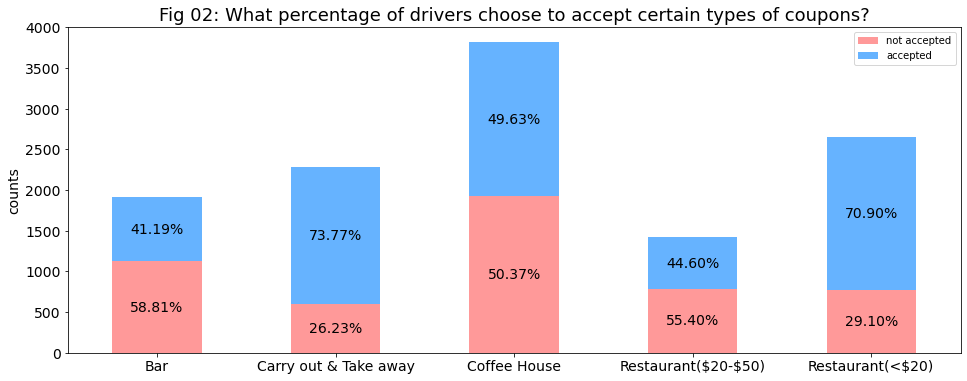

In [8]:
df_coupon = df.groupby(["coupon","Y"]).size().unstack()
df_coupon.columns = ["not accepted","accepted"]
df_coupon.index = ['Bar', 'Carry out & Take away', 'Coffee House', 'Restaurant(\$20-\$50)','Restaurant(<\$20)']

totals = df_coupon["not accepted"]+df_coupon["accepted"]
df_coupon["not accepted (%)"] = np.round((df_coupon["not accepted"]/totals)*100,2)
df_coupon["accepted (%)"] = np.round((df_coupon["accepted"]/totals)*100,2)

fig_02 = plt.figure(figsize=(16,6),facecolor="white")
df_coupon[["not accepted","accepted"]].plot.bar(\
    ax=plt.gca(),
    color=colors,
    fontsize=14,
    stacked=True)

for x_val in range(df_coupon.shape[0]):
    idx = df_coupon.index[x_val]
    y_val1 = df_coupon.loc[idx,"not accepted"]/2
    y_val2 = df_coupon.loc[idx,"not accepted"]+(df_coupon.loc[idx,"accepted"]/2)

    plt.text(x_val,y_val1,"%.2f%%" %(df_coupon.loc[idx,"not accepted (%)"]),\
        horizontalalignment="center",
        verticalalignment="center",
        fontsize=14)
    plt.text(x_val,y_val2,"%.2f%%" %(df_coupon.loc[idx,"accepted (%)"]),\
        horizontalalignment="center",
        verticalalignment="center",
        fontsize=14)
    
plt.title("Fig 02: What percentage of drivers choose to accept certain types of coupons?",fontsize=18)
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("counts",fontsize=14)
plt.show()

#### 6. Use a histogram to visualize the temperature column.

According to Wikipedia, the room or comfortable temperature can be vary, but it is usually between 68 and 82 degrees Fahrenheit. Any temperature below freezing point (32F or 0C degree) would be considered freezing, while a temperature between freezing and warm would be considered cold.

The temperature were divided into three categories (freezing: 30F, cold: 55F, and warm: 80F). In Figure 3, we can clearly see that the acceptance rate for both freezing and cold weather is between **<font color=#66b3ff>50%</font>**, while the acceptance for warm weather is higher (about **<font color=#66b3ff>60%</font>**).

In Figures 4, 5 and 6, we will examine the coupon acceptance rates for different promotion types under different temperature conditions. In freezing temperatures, drivers are more likely to choose take-out restaurants because they do not want to stay outside for too long. Conversely, drivers are not willing to accept coupons for entertainment or expensive restaurants.

In the cold temperatures, we still observe the major share (**<font color=#66b3ff>>70%</font>**) of coupon acceptance fall into the two categories: take-out and inexpensive restaurant. However, we notice that the quantities share to with the total proportion have been drop dramatically comparing with freezing temperature. drivers are receiving more bar and coffee shop promotional coupon in this weather.

In the warm temperatures, we still observe the major share (**<font color=#66b3ff>>70%</font>**) of coupon acceptance fall into the two categories: take-out and inexpensive restaurant. In addition, the coupon acceptance rates for coffee house has increased over 50% during this temperature, and that is because that drivers are dehydrate during this condition.

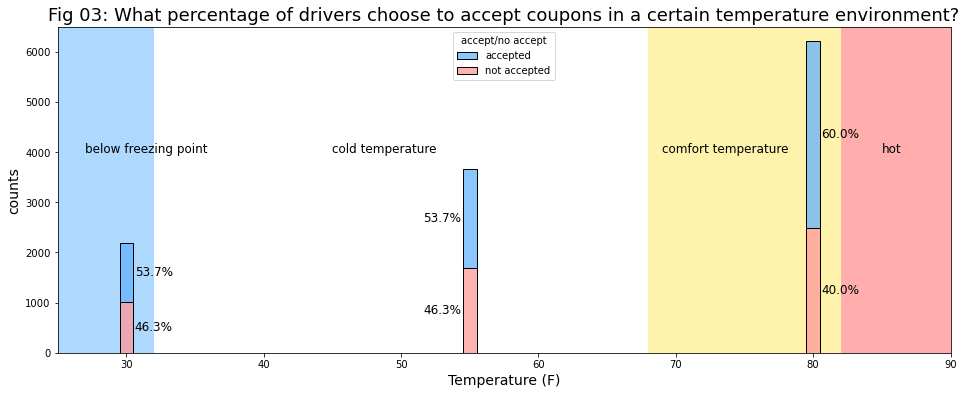

In [9]:
df_temp = pd.DataFrame(zip(df["temperature"],df["Y"],[""]*df.shape[0],df["coupon"]),\
    columns=["temperature","Y","accept/no accept","coupon"])
df_temp.loc[df_temp["Y"]==1,"accept/no accept"] = "accepted"
df_temp.loc[df_temp["Y"]==0,"accept/no accept"] = "not accepted"
df_temp = df_temp.drop(columns="Y")

df_temp_group = df_temp.groupby(["temperature","accept/no accept"]).size().unstack()
totals = df_temp_group["accepted"]+df_temp_group["not accepted"]
df_temp_group["accepted (%)"] = np.round(100*df_temp_group["accepted"]/totals,2)
df_temp_group["not accepted (%)"] = np.round(100*df_temp_group["not accepted"]/totals,2)

fig_03 = plt.figure(figsize=(16,6),facecolor="white")
plt.gca().add_patch(Rectangle((25,0), 7, 6500,edgecolor='none',facecolor='#33A2FF',fill=True,alpha=0.4))
plt.gca().add_patch(Rectangle((68,0), 14, 6500,edgecolor='none',facecolor='#FFE033',fill=True,alpha=0.4))
plt.gca().add_patch(Rectangle((82,0), 8, 6500,edgecolor='none',facecolor='#FF3333',fill=True,alpha=0.4))
plt.text(27,4000,"below freezing point",fontsize=12)
plt.text(45,4000,"cold temperature",fontsize=12)
plt.text(69,4000,"comfort temperature",fontsize=12)
plt.text(85,4000,"hot",fontsize=12)

sns.histplot(ax=plt.gca(),data=df_temp,\
    x="temperature",
    hue="accept/no accept",
    multiple="stack",
    palette=colors[1::-1],
    discrete=True)

offset = 1
d = -1
for x_val in [30,55,80]:
    y_val1 = df_temp_group.loc[x_val,"not accepted"]/2
    y_val2 = df_temp_group.loc[x_val,"not accepted"]+(df_temp_group.loc[x_val,"accepted"]/2)

    offset = offset*d
    plt.text(x_val-2*offset,y_val1,"%.1f%%" %(df_temp_group.loc[x_val,"not accepted (%)"]),\
        horizontalalignment="center",
        verticalalignment="center",
        fontsize=12)
    
    plt.text(x_val-2*offset,y_val2,"%.1f%%" %(df_temp_group.loc[x_val,"accepted (%)"]),\
        horizontalalignment="center",
        verticalalignment="center",
        fontsize=12)

plt.title("Fig 03: What percentage of drivers choose to accept coupons in a certain temperature environment?",fontsize=18)
plt.xlabel("Temperature (F)",fontsize=14)
plt.ylabel("counts",fontsize=14)
plt.xlim([25,90])
plt.ylim([0,6500])
plt.show()

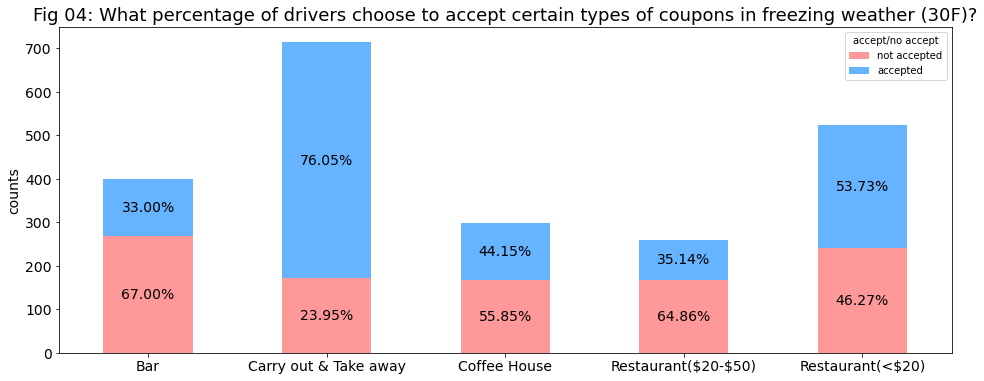

In [10]:
df_coupon_t30 = df_temp[df_temp["temperature"]==30].reset_index().groupby(["coupon","accept/no accept"]).size().unstack()
df_coupon_t30.index = ['Bar', 'Carry out & Take away', 'Coffee House', 'Restaurant(\$20-\$50)','Restaurant(<\$20)']

totals = df_coupon_t30["not accepted"]+df_coupon_t30["accepted"]
df_coupon_t30["not accepted (%)"] = np.round((df_coupon_t30["not accepted"]/totals)*100,2)
df_coupon_t30["accepted (%)"] = np.round((df_coupon_t30["accepted"]/totals)*100,2)

fig_04 = plt.figure(figsize=(16,6),facecolor="white")
df_coupon_t30[["not accepted","accepted"]].plot.bar(\
    ax=plt.gca(),
    color=colors,
    fontsize=14,
    stacked=True)

for x_val in range(df_coupon_t30.shape[0]):
    idx = df_coupon_t30.index[x_val]
    y_val1 = df_coupon_t30.loc[idx,"not accepted"]/2
    y_val2 = df_coupon_t30.loc[idx,"not accepted"]+(df_coupon_t30.loc[idx,"accepted"]/2)

    plt.text(x_val,y_val1,"%.2f%%" %(df_coupon_t30.loc[idx,"not accepted (%)"]),\
        horizontalalignment="center",
        verticalalignment="center",
        fontsize=14)
    plt.text(x_val,y_val2,"%.2f%%" %(df_coupon_t30.loc[idx,"accepted (%)"]),\
        horizontalalignment="center",
        verticalalignment="center",
        fontsize=14)
    

plt.title("Fig 04: What percentage of drivers choose to accept certain types of coupons in freezing weather (30F)?",fontsize=18)
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("counts",fontsize=14)
plt.show()

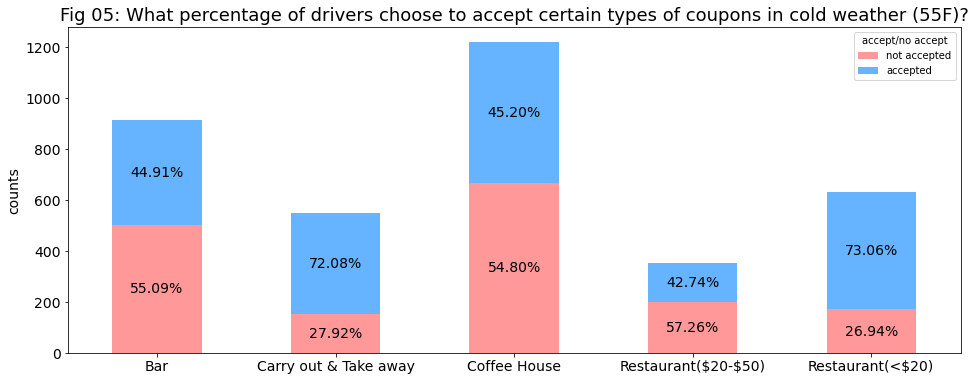

In [11]:
df_coupon_t55 = df_temp[df_temp["temperature"]==55].reset_index().groupby(["coupon","accept/no accept"]).size().unstack()
df_coupon_t55.index = ['Bar', 'Carry out & Take away', 'Coffee House', 'Restaurant(\$20-\$50)','Restaurant(<\$20)']

totals = df_coupon_t55["not accepted"]+df_coupon_t55["accepted"]
df_coupon_t55["not accepted (%)"] = np.round((df_coupon_t55["not accepted"]/totals)*100,2)
df_coupon_t55["accepted (%)"] = np.round((df_coupon_t55["accepted"]/totals)*100,2)

fig_05 = plt.figure(figsize=(16,6),facecolor="white")
df_coupon_t55[["not accepted","accepted"]].plot.bar(\
    ax=plt.gca(),
    color=colors,
    fontsize=14,
    stacked=True)

for x_val in range(df_coupon_t55.shape[0]):
    idx = df_coupon_t55.index[x_val]
    y_val1 = df_coupon_t55.loc[idx,"not accepted"]/2
    y_val2 = df_coupon_t55.loc[idx,"not accepted"]+(df_coupon_t55.loc[idx,"accepted"]/2)

    plt.text(x_val,y_val1,"%.2f%%" %(df_coupon_t55.loc[idx,"not accepted (%)"]),\
        horizontalalignment="center",
        verticalalignment="center",
        fontsize=14)
    plt.text(x_val,y_val2,"%.2f%%" %(df_coupon_t55.loc[idx,"accepted (%)"]),\
        horizontalalignment="center",
        verticalalignment="center",
        fontsize=14)
    

plt.title("Fig 05: What percentage of drivers choose to accept certain types of coupons in cold weather (55F)?",fontsize=18)
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("counts",fontsize=14)
plt.show()

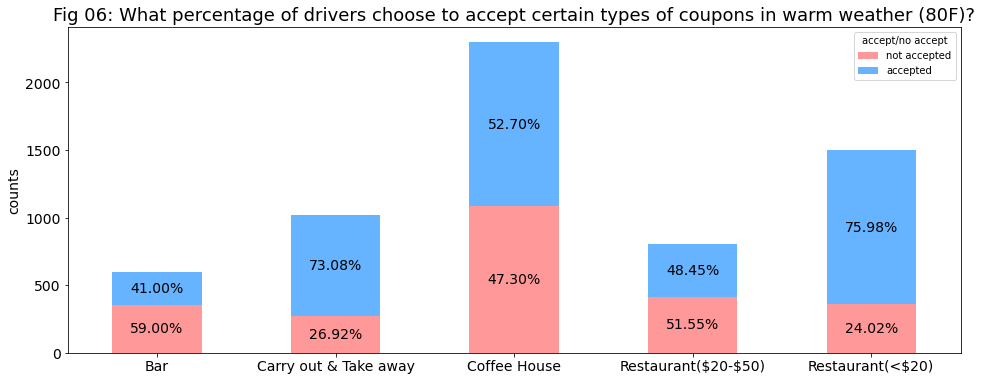

In [12]:
df_coupon_t80 = df_temp[df_temp["temperature"]==80].reset_index().groupby(["coupon","accept/no accept"]).size().unstack()
df_coupon_t80.index = ['Bar', 'Carry out & Take away', 'Coffee House', 'Restaurant(\$20-\$50)','Restaurant(<\$20)']

totals = df_coupon_t80["not accepted"]+df_coupon_t80["accepted"]
df_coupon_t80["not accepted (%)"] = np.round((df_coupon_t80["not accepted"]/totals)*100,2)
df_coupon_t80["accepted (%)"] = np.round((df_coupon_t80["accepted"]/totals)*100,2)

fig_06 = plt.figure(figsize=(16,6),facecolor="white")
df_coupon_t80[["not accepted","accepted"]].plot.bar(\
    ax=plt.gca(),
    color=colors,
    fontsize=14,
    stacked=True)

for x_val in range(df_coupon_t80.shape[0]):
    idx = df_coupon_t80.index[x_val]
    y_val1 = df_coupon_t80.loc[idx,"not accepted"]/2
    y_val2 = df_coupon_t80.loc[idx,"not accepted"]+(df_coupon_t80.loc[idx,"accepted"]/2)

    plt.text(x_val,y_val1,"%.2f%%" %(df_coupon_t80.loc[idx,"not accepted (%)"]),\
        horizontalalignment="center",
        verticalalignment="center",
        fontsize=14)
    plt.text(x_val,y_val2,"%.2f%%" %(df_coupon_t80.loc[idx,"accepted (%)"]),\
        horizontalalignment="center",
        verticalalignment="center",
        fontsize=14)
    

plt.title("Fig 06: What percentage of drivers choose to accept certain types of coupons in warm weather (80F)?",fontsize=18)
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("counts",fontsize=14)
plt.show()

### Investigating the Bar Coupons

Now, we will lead you through an exploration of just the bar related coupons.

#### 1. Create a new `DataFrame` that contains just the bar coupons.

In [13]:
df_bar = df[df["coupon"]=="Bar"].reset_index()
df_bar.head()

,index,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,2,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,...,never,less1,4~8,4~8,less1,0,0,0,1,1
1,13,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,...,never,less1,4~8,4~8,less1,0,0,1,0,1
2,17,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,...,never,less1,4~8,4~8,less1,1,1,0,1,1
3,24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,...,never,4~8,1~3,1~3,never,0,0,0,1,0
4,35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,...,never,4~8,1~3,1~3,never,0,0,1,0,0


#### 2. What proportion of bar coupons were accepted?
Of the 1,913 observations that included only bar promotional coupons, about **<font color=#66b3ff>41.2%</font>** of drivers will accepted the coupon, and about **<font color=#ff9999>58.8%</font>** of drivers will NOT accepted the coupon.

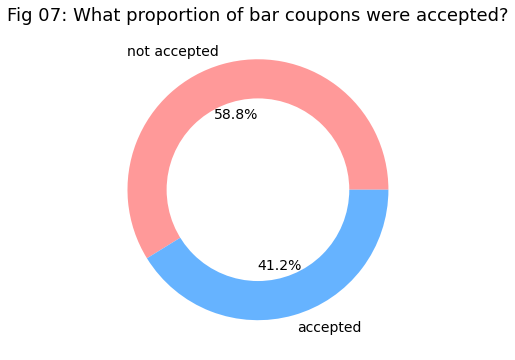

In [14]:
fig_07 = plt.figure(figsize=(8,6),facecolor="white")
df_bar.groupby("Y").size().plot.pie(\
    labels=["not accepted", "accepted"],
    autopct="%1.1f%%",
    colors=colors,
    fontsize=14)
plt.title("Fig 07: What proportion of bar coupons were accepted?",fontsize=18)
plt.ylabel("")
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))
plt.show()

#### 3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.
Clearly, we can see that those who have been to a bar more than 3 times in a month are more likely to accept coupons (about **<font color=#66b3ff>76.2%</font>**). Conversely, those who have been to a bar 3 times or less are more likely to not accept coupons (about **<font color=#ff9999>62.7%</font>**). As we described earlier, "direct application to what you need" is a key factor in whether a person accepts coupons.

One thing we have to keep in mind is that these two groups have very different sample sizes, so this may be a factor that needs to be adjusted for.

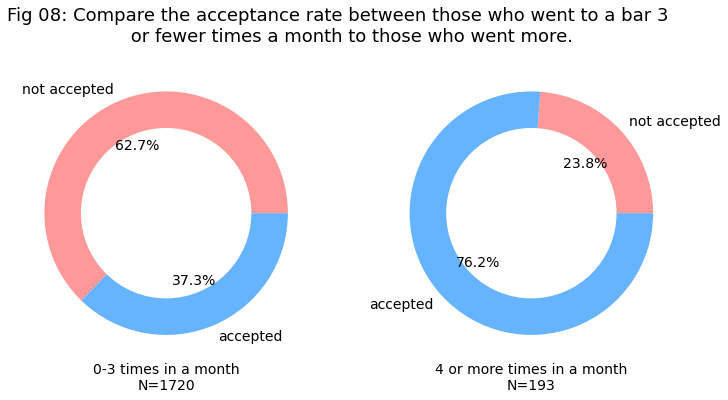

In [15]:
df_bar_31 = df_bar[["Bar","Y"]].query("(Bar=='never') or (Bar=='less1') or (Bar=='1~3')").groupby("Y").count().reset_index()
df_bar_31.columns = ["accept/no accept","count (visit<=3)"]
df_bar_31["accept/no accept"] = ["not accepted","accepted"]
df_bar_32 = df_bar[["Bar","Y"]].query("(Bar=='4~8') or (Bar=='gt8')").groupby("Y").count().reset_index()
df_bar_32.columns = ["accept/no accept","count (visit>4)"]
df_bar_32["accept/no accept"] = ["not accepted","accepted"]
df_bar_33 = pd.DataFrame.transpose(df_bar_31.merge(df_bar_32).set_index("accept/no accept"))

totals = df_bar_33["not accepted"]+df_bar_33["accepted"]
df_bar_33["not accepted (%)"] = np.round(100*df_bar_33["not accepted"]/totals,2)
df_bar_33["accepted (%)"] = np.round(100*df_bar_33["accepted"]/totals,2)

fig_08 = plt.figure(figsize=(12,6),facecolor="white")
plt.suptitle("Fig 08: Compare the acceptance rate between those who went to a bar 3\n \
    or fewer times a month to those who went more.",\
    fontsize=18)
fig_08.add_subplot(1,2,1)
df_bar_33.loc["count (visit<=3)",["not accepted","accepted"]].plot.pie(\
    labels=["not accepted", "accepted"],
    autopct="%1.1f%%",
    colors=colors,
    fontsize=14)
plt.title("0-3 times in a month\nN=%d" %totals[0],fontsize=14,y=-0.1)
plt.ylabel("")
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))

fig_08.add_subplot(1,2,2)
df_bar_33.loc["count (visit>4)",["not accepted","accepted"]].plot.pie(\
    labels=["not accepted", "accepted"],
    autopct="%1.1f%%",
    colors=colors,
    fontsize=14)
plt.title("4 or more times in a month\nN=%d" %totals[1],fontsize=14,y=-0.1)
plt.ylabel("")
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))
plt.show()


#### 4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others. Is there a difference?

Yes, there is difference, and the acceptance rate for drivers who go to a bar more than once a month and are over the age of 25 (abovt **<font color=#66b3ff>69.0%</font>**) is much higher than the other group (about **<font color=#66b3ff>33.8%</font>**). As we described earlier, "direct application to what you need" is a key factor in whether a person accepts coupons.

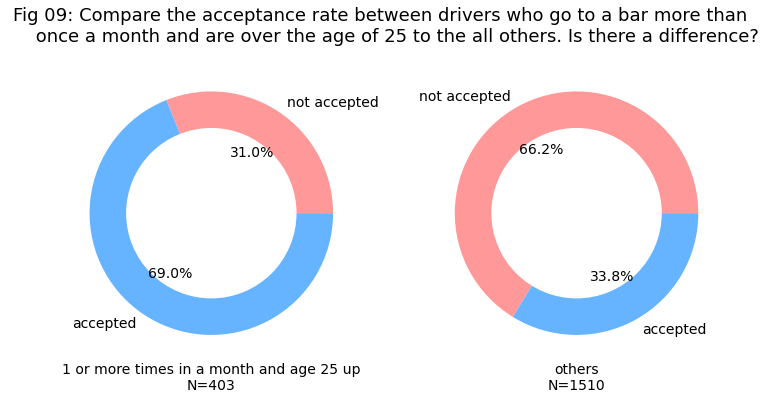

In [16]:
tmp = df_bar[["Bar","Y","age"]].query("((Bar=='1~3') or (Bar=='4~8') or (Bar=='gt8')) and \
    ((age=='26') or (age=='31') or (age=='36') or (age=='41') or (age=='46') or (age=='50plus'))")
df_bar_42 = df_bar.loc[df_bar.index.difference(tmp.index),["Bar","Y","age"]].groupby("Y").count().reset_index()
df_bar_41 = tmp.groupby("Y").count().reset_index()
df_bar_41.columns = ["accept/no accept","count (visit>=3 & age>25)","col"]
df_bar_41["accept/no accept"] = ["not accepted","accepted"]
df_bar_41 = df_bar_41.drop(columns="col")
df_bar_42.columns = ["accept/no accept","count (others)","col"]
df_bar_42["accept/no accept"] = ["not accepted","accepted"]
df_bar_42 = df_bar_42.drop(columns="col")
df_bar_43 = pd.DataFrame.transpose(df_bar_41.merge(df_bar_42).set_index("accept/no accept"))

totals = df_bar_43["not accepted"]+df_bar_43["accepted"]
df_bar_43["not accepted (%)"] = np.round(100*df_bar_43["not accepted"]/totals,2)
df_bar_43["accepted (%)"] = np.round(100*df_bar_43["accepted"]/totals,2)

fig_09 = plt.figure(figsize=(12,6),facecolor="white")
plt.suptitle("Fig 09: Compare the acceptance rate between drivers who go to a bar more than \n \
    once a month and are over the age of 25 to the all others. Is there a difference?",\
    fontsize=18)
fig_09.add_subplot(1,2,1)
df_bar_43.loc["count (visit>=3 & age>25)",["not accepted","accepted"]].plot.pie(\
    labels=["not accepted", "accepted"],
    autopct="%1.1f%%",
    colors=colors,
    fontsize=14)
plt.title("1 or more times in a month and age 25 up\nN=%d" %totals[0],fontsize=14,y=-0.1)
plt.ylabel("")
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))

fig_09.add_subplot(1,2,2)
df_bar_43.loc["count (others)",["not accepted","accepted"]].plot.pie(\
    labels=["not accepted", "accepted"],
    autopct="%1.1f%%",
    colors=colors,
    fontsize=14)
plt.title("others\nN=%d" %totals[1],fontsize=14,y=-0.1)
plt.ylabel("")
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))
plt.show()

#### 5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 

In this section, we are comparing three different groups of people who receive promotional coupon for local bar restaurant. As we described earlier, "direct application to what you need" is a key factor in whether a person accepts coupons. With that, we can see some pattern by comparing their acceptance rate with the opposite group. Below are the three groups. 

- **the acceptance rate between drivers who go to bars more than once a month**
    
    As we explained earlier, people who had spent more time in bar are more willing to accept this coupon, because that directly fit their need. About **<font color=#66b3ff>68.5%</font>** of people who frequently goes bar 1 or more time per month are willing to accept this coupon. Conversely, only with **<font color=#66b3ff>29.5%</font>** of people in opposite group are willing to accetp this coupon.

- **had passengers that were not a kid**
    
    In this scenario, both cases have more than 50% of rejection rate (**<font color=#ff9999>51.4%</font>** and **<font color=#ff9999>62.0%</font>**). However, we notice that the rejection rate for the car with kids inside will greatly affect the decision of the driver.

- **had occupations other than farming, fishing, or forestry**
    
    We are hardly to compare this group because the sample size is very different. The data only contain 9 surveys with those people who has occuptaion with farming, fishing, or forestry. Therefore, we are not able to draw any conclusion for this scenario.


In [17]:
# the acceptance rate between drivers who go to bars more than once a month
df_bar_511 = df_bar[["Bar","Y"]].query("((Bar=='1~3') or (Bar=='4~8') or (Bar=='gt8'))")
df_bar_512 = df_bar.loc[df_bar.index.difference(df_bar_511.index),["Bar","Y"]].groupby("Y").count().reset_index()
df_bar_511 = df_bar_511.groupby("Y").count().reset_index()
df_bar_511.columns = ["accept/no accept","count (visit>=1)"]
df_bar_511["accept/no accept"] = ["not accepted","accepted"]
df_bar_512.columns = ["accept/no accept","count (visit<1)"]
df_bar_512["accept/no accept"] = ["not accepted","accepted"]
df_bar_51 = pd.DataFrame.transpose(df_bar_511.merge(df_bar_512).set_index("accept/no accept"))
df_bar_51['total'] = df_bar_51["not accepted"]+df_bar_51["accepted"]
df_bar_51["not accepted (%)"] = np.round(100*df_bar_51["not accepted"]/df_bar_51['total'],2)
df_bar_51["accepted (%)"] = np.round(100*df_bar_51["accepted"]/df_bar_51['total'],2)

# had passengers that were not a kid
df_bar_521 = df_bar[["passanger","Y"]].query("((passanger!='Kid(s)') and (passanger!='Alone'))")
df_bar_522 = df_bar.loc[df_bar.index.difference(df_bar_521.index),["Bar","Y"]].groupby("Y").count().reset_index()
df_bar_521 = df_bar_521.groupby("Y").count().reset_index()
df_bar_521.columns = ["accept/no accept","count (not kid)"]
df_bar_521["accept/no accept"] = ["not accepted","accepted"]
df_bar_522.columns = ["accept/no accept","count (kid)"]
df_bar_522["accept/no accept"] = ["not accepted","accepted"]
df_bar_52 = pd.DataFrame.transpose(df_bar_521.merge(df_bar_522).set_index("accept/no accept"))
df_bar_52['total'] = df_bar_52["not accepted"]+df_bar_52["accepted"]
df_bar_52["not accepted (%)"] = np.round(100*df_bar_52["not accepted"]/df_bar_52['total'],2)
df_bar_52["accepted (%)"] = np.round(100*df_bar_52["accepted"]/df_bar_52['total'],2)

# had occupations other than farming, fishing, or forestry
df_bar_531 = df_bar[["occupation","Y"]].query("occupation!='Farming Fishing & Forestry'")
df_bar_532 = df_bar.loc[df_bar.index.difference(df_bar_531.index),["Bar","Y"]].groupby("Y").count().reset_index()
df_bar_531 = df_bar_531.groupby("Y").count().reset_index()
df_bar_531.columns = ["accept/no accept","count (not fff)"]
df_bar_531["accept/no accept"] = ["not accepted","accepted"]
df_bar_532.columns = ["accept/no accept","count (fff)"]
df_bar_532["accept/no accept"] = ["not accepted","accepted"]
df_bar_53 = pd.DataFrame.transpose(df_bar_531.merge(df_bar_532).set_index("accept/no accept"))
df_bar_53['total'] = df_bar_53["not accepted"]+df_bar_53["accepted"]
df_bar_53["not accepted (%)"] = np.round(100*df_bar_53["not accepted"]/df_bar_53['total'],2)
df_bar_53["accepted (%)"] = np.round(100*df_bar_53["accepted"]/df_bar_53['total'],2)

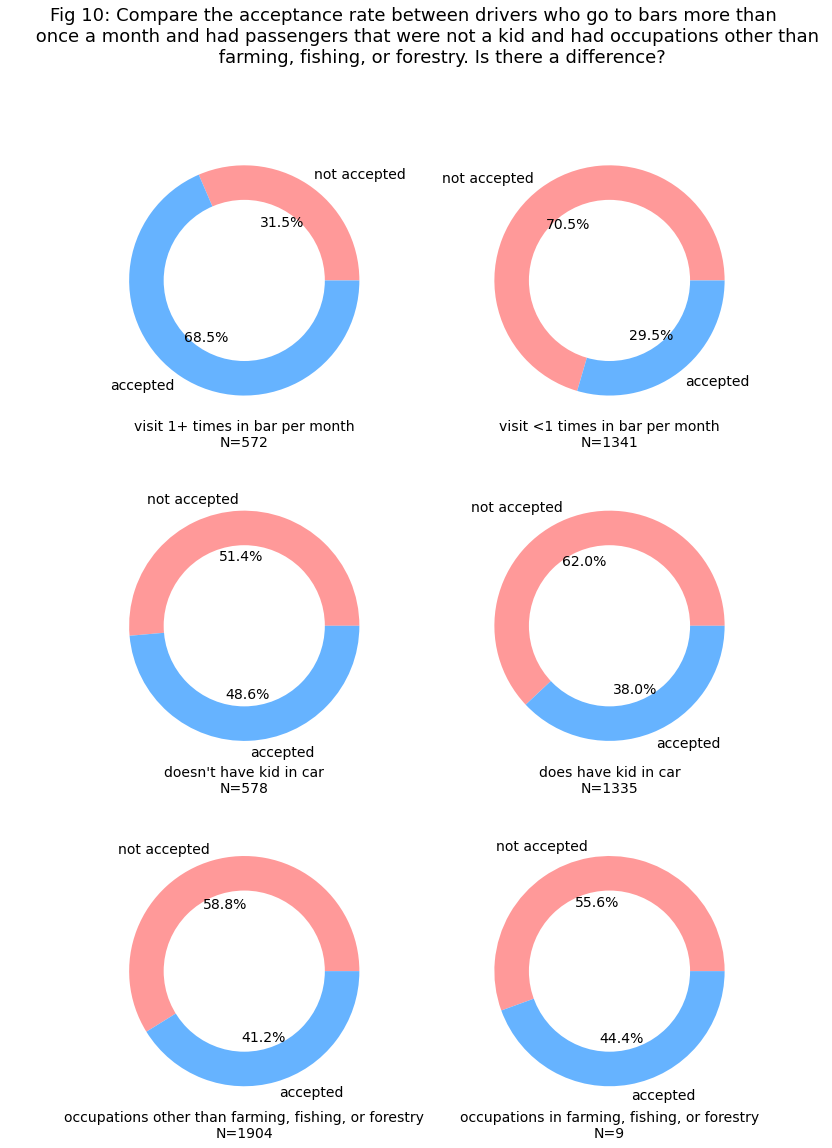

In [18]:
fig_10 = plt.figure(figsize=(12,18),facecolor="white")
plt.suptitle("Fig 10: Compare the acceptance rate between drivers who go to bars more than \n \
    once a month and had passengers that were not a kid and had occupations other than \n \
        farming, fishing, or forestry. Is there a difference?",\
    fontsize=18)

# the acceptance rate between drivers who go to bars more than once a month
fig_10.add_subplot(3,2,1)
df_bar_51.loc["count (visit>=1)",["not accepted","accepted"]].plot.pie(\
    labels=["not accepted", "accepted"],
    autopct="%1.1f%%",
    colors=colors,
    fontsize=14)
plt.title("visit 1+ times in bar per month\nN=%d" \
    %df_bar_51.loc["count (visit>=1)",'total'],fontsize=14,y=-0.1)
plt.ylabel("")
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))

fig_10.add_subplot(3,2,2)
df_bar_51.loc["count (visit<1)",["not accepted","accepted"]].plot.pie(\
    labels=["not accepted", "accepted"],
    autopct="%1.1f%%",
    colors=colors,
    fontsize=14)
plt.title("visit <1 times in bar per month\nN=%d" \
    %df_bar_51.loc["count (visit<1)",'total'],fontsize=14,y=-0.1)
plt.ylabel("")
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))

# had passengers that were not a kid
fig_10.add_subplot(3,2,3)
df_bar_52.loc["count (not kid)",["not accepted","accepted"]].plot.pie(\
    labels=["not accepted", "accepted"],
    autopct="%1.1f%%",
    colors=colors,
    fontsize=14)
plt.title("doesn't have kid in car\nN=%d" \
    %df_bar_52.loc["count (not kid)",'total'],fontsize=14,y=-0.1)
plt.ylabel("")
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))

fig_10.add_subplot(3,2,4)
df_bar_52.loc["count (kid)",["not accepted","accepted"]].plot.pie(\
    labels=["not accepted", "accepted"],
    autopct="%1.1f%%",
    colors=colors,
    fontsize=14)
plt.title("does have kid in car\nN=%d" \
    %df_bar_52.loc["count (kid)",'total'],fontsize=14,y=-0.1)
plt.ylabel("")
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))

# had occupations other than farming, fishing, or forestry
fig_10.add_subplot(3,2,5)
df_bar_53.loc["count (not fff)",["not accepted","accepted"]].plot.pie(\
    labels=["not accepted", "accepted"],
    autopct="%1.1f%%",
    colors=colors,
    fontsize=14)
plt.title("occupations other than farming, fishing, or forestry\nN=%d" \
    %df_bar_53.loc["count (not fff)",'total'],fontsize=14,y=-0.1)
plt.ylabel("")
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))

fig_10.add_subplot(3,2,6)
df_bar_53.loc["count (fff)",["not accepted","accepted"]].plot.pie(\
    labels=["not accepted", "accepted"],
    autopct="%1.1f%%",
    colors=colors,
    fontsize=14)
plt.title("occupations in farming, fishing, or forestry\nN=%d" \
    %df_bar_53.loc["count (fff)",'total'],fontsize=14,y=-0.1)
plt.ylabel("")
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))

plt.show()

#### 6. Compare the acceptance rates between those drivers who:

In this section, we are comparing three different groups of people who receive promotional coupon for local bar restaurant. As we described earlier, "direct application to what you need" is a key factor in whether a person accepts coupons. With that, we can see some pattern by comparing their acceptance rate with the opposite group. Below are the three groups.

- **go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR***
- **go to bars more than once a month and are under the age of 30 *OR***
- **go to cheap restaurants more than 4 times a month and income is less than 50K.**

As we explained earlier, people who had spent more time in bar are more willing to accept this coupon, because that directly fit their need. About **<font color=#66b3ff>71.4%</font>**  and **<font color=#66b3ff>72.0%</font>** of people who frequently goes bar 1 or more time per month are willing to accept this coupon. Even though there are slightly different sub-condition for both groups, the results are very similar comparing to each other. In the third group where the driver like to go to cheap restaurant and have less income (about **<font color=#66b3ff>45.6%</font>**), the willingness of accepting this coupon is not noticeable and that is because it does not directly fit their need, so it does not have strong effect.

In [19]:
# go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
df_bar_611 = df_bar[["Y","Bar","passanger","maritalStatus"]].query(\
    "((Bar=='1~3') or (Bar=='4~8') or (Bar=='gt8')) and \
        ((passanger!='Kid(s)') and (passanger!='Alone')) and \
            (maritalStatus!='Widowed')")
df_bar_612 = df_bar.loc[df_bar.index.difference(df_bar_611.index),["Bar","Y"]].groupby("Y").count().reset_index()
df_bar_611 = df_bar_611.groupby("Y").count().reset_index()
df_bar_611.columns = ["accept/no accept","count (visit>=1 & no kid & not widowed)","col1","col2"]
df_bar_611 = df_bar_611.drop(columns=["col1","col2"])
df_bar_611["accept/no accept"] = ["not accepted","accepted"]
df_bar_612.columns = ["accept/no accept","count (others)"]
df_bar_612["accept/no accept"] = ["not accepted","accepted"]
df_bar_61 = pd.DataFrame.transpose(df_bar_611.merge(df_bar_612).set_index("accept/no accept"))
df_bar_61['total'] = df_bar_61["not accepted"]+df_bar_61["accepted"]
df_bar_61["not accepted (%)"] = np.round(100*df_bar_61["not accepted"]/df_bar_61['total'],2)
df_bar_61["accepted (%)"] = np.round(100*df_bar_61["accepted"]/df_bar_61['total'],2)

# go to bars more than once a month and are under the age of 30 *OR*
df_bar_621 = df_bar[["Y","Bar","age"]].query(\
    "((Bar=='1~3') or (Bar=='4~8') or (Bar=='gt8')) and \
        ((age=='below21') or (age=='21') or (age=='26'))")
df_bar_622 = df_bar.loc[df_bar.index.difference(df_bar_621.index),["Bar","Y"]].groupby("Y").count().reset_index()
df_bar_621 = df_bar_621.groupby("Y").count().reset_index()
df_bar_621.columns = ["accept/no accept","count (visit>=1 & age<=30)","col1"]
df_bar_621 = df_bar_621.drop(columns=["col1"])
df_bar_621["accept/no accept"] = ["not accepted","accepted"]
df_bar_622.columns = ["accept/no accept","count (others)"]
df_bar_622["accept/no accept"] = ["not accepted","accepted"]
df_bar_62 = pd.DataFrame.transpose(df_bar_621.merge(df_bar_622).set_index("accept/no accept"))
df_bar_62['total'] = df_bar_62["not accepted"]+df_bar_62["accepted"]
df_bar_62["not accepted (%)"] = np.round(100*df_bar_62["not accepted"]/df_bar_62['total'],2)
df_bar_62["accepted (%)"] = np.round(100*df_bar_62["accepted"]/df_bar_62['total'],2)

# go to cheap restaurants more than 4 times a month and income is less than 50K.
df_bar_631 = df_bar[["Y","RestaurantLessThan20","income"]].query(\
    "((RestaurantLessThan20=='4~8') or (RestaurantLessThan20=='gt8')) and \
        ((income=='Less than $12500') or (income=='$12500 - $24999') or \
         (income=='$25000 - $37499') or (income=='$37500 - $49999'))")
df_bar_632 = df_bar.loc[df_bar.index.difference(df_bar_631.index),["Bar","Y"]].groupby("Y").count().reset_index()
df_bar_631 = df_bar_631.groupby("Y").count().reset_index()
df_bar_631.columns = ["accept/no accept","count (visit>=4 & inc<=50k)","col1"]
df_bar_631 = df_bar_631.drop(columns=["col1"])
df_bar_631["accept/no accept"] = ["not accepted","accepted"]
df_bar_632.columns = ["accept/no accept","count (others)"]
df_bar_632["accept/no accept"] = ["not accepted","accepted"]
df_bar_63 = pd.DataFrame.transpose(df_bar_631.merge(df_bar_632).set_index("accept/no accept"))
df_bar_63['total'] = df_bar_63["not accepted"]+df_bar_63["accepted"]
df_bar_63["not accepted (%)"] = np.round(100*df_bar_63["not accepted"]/df_bar_63['total'],2)
df_bar_63["accepted (%)"] = np.round(100*df_bar_63["accepted"]/df_bar_63['total'],2)


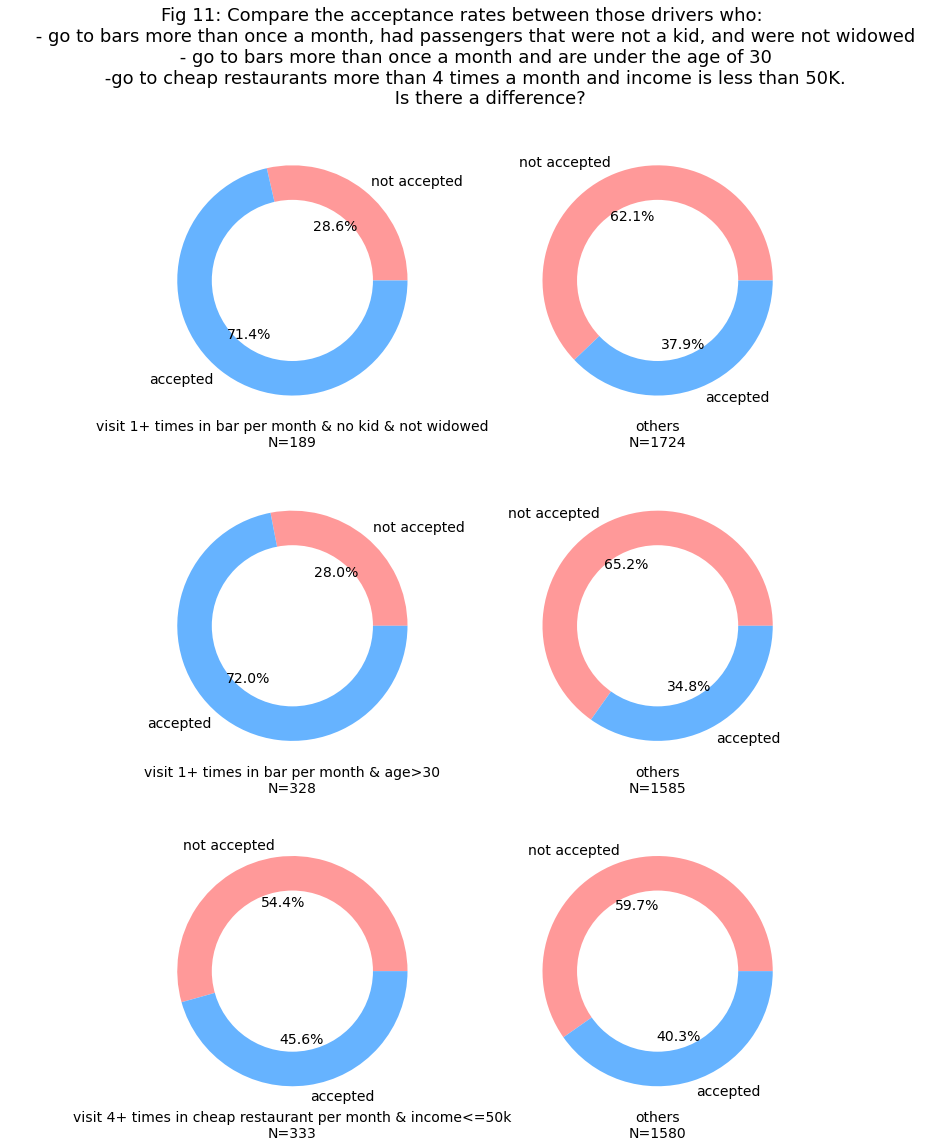

In [20]:
fig_11 = plt.figure(figsize=(12,18),facecolor="white")
plt.suptitle("Fig 11: Compare the acceptance rates between those drivers who: \n \
    - go to bars more than once a month, had passengers that were not a kid, and were not widowed \n \
    - go to bars more than once a month and are under the age of 30 \n \
    -go to cheap restaurants more than 4 times a month and income is less than 50K. \n \
        Is there a difference?",\
    fontsize=18)

# go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
fig_11.add_subplot(3,2,1)
df_bar_61.loc["count (visit>=1 & no kid & not widowed)",["not accepted","accepted"]].plot.pie(\
    labels=["not accepted", "accepted"],
    autopct="%1.1f%%",
    colors=colors,
    fontsize=14)
plt.title("visit 1+ times in bar per month & no kid & not widowed\nN=%d" \
    %df_bar_61.loc["count (visit>=1 & no kid & not widowed)",'total'],fontsize=14,y=-0.1)
plt.ylabel("")
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))

fig_11.add_subplot(3,2,2)
df_bar_61.loc["count (others)",["not accepted","accepted"]].plot.pie(\
    labels=["not accepted", "accepted"],
    autopct="%1.1f%%",
    colors=colors,
    fontsize=14)
plt.title("others\nN=%d" \
    %df_bar_61.loc["count (others)",'total'],fontsize=14,y=-0.1)
plt.ylabel("")
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))

# go to bars more than once a month and are under the age of 30 *OR*
fig_11.add_subplot(3,2,3)
df_bar_62.loc["count (visit>=1 & age<=30)",["not accepted","accepted"]].plot.pie(\
    labels=["not accepted", "accepted"],
    autopct="%1.1f%%",
    colors=colors,
    fontsize=14)
plt.title("visit 1+ times in bar per month & age>30\nN=%d" \
    %df_bar_62.loc["count (visit>=1 & age<=30)",'total'],fontsize=14,y=-0.1)
plt.ylabel("")
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))

fig_11.add_subplot(3,2,4)
df_bar_62.loc["count (others)",["not accepted","accepted"]].plot.pie(\
    labels=["not accepted", "accepted"],
    autopct="%1.1f%%",
    colors=colors,
    fontsize=14)
plt.title("others\nN=%d" \
    %df_bar_62.loc["count (others)",'total'],fontsize=14,y=-0.1)
plt.ylabel("")
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))

# go to cheap restaurants more than 4 times a month and income is less than 50K.
fig_11.add_subplot(3,2,5)
df_bar_63.loc["count (visit>=4 & inc<=50k)",["not accepted","accepted"]].plot.pie(\
    labels=["not accepted", "accepted"],
    autopct="%1.1f%%",
    colors=colors,
    fontsize=14)
plt.title("visit 4+ times in cheap restaurant per month & income<=50k\nN=%d" \
    %df_bar_63.loc["count (visit>=4 & inc<=50k)",'total'],fontsize=14,y=-0.1)
plt.ylabel("")
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))

fig_11.add_subplot(3,2,6)
df_bar_63.loc["count (others)",["not accepted","accepted"]].plot.pie(\
    labels=["not accepted", "accepted"],
    autopct="%1.1f%%",
    colors=colors,
    fontsize=14)
plt.title("others\nN=%d" \
    %df_bar_63.loc["count (others)",'total'],fontsize=14,y=-0.1)
plt.ylabel("")
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))

plt.show()

#### 7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In previous excerises, we have compared different groups' acceptance rate toward promotional coupons for bar restaurant. Among all of the factors or features, the key factor of that person whether to accept or reject the promotion is majorly based on their needs. As we have pointed out earlier, "direct application to what you need" is the key factor, and one of the indicator is the frequency of that person visit bar restaurant.

Other than that, whethear there is a kid on the car or if the driver is single can also affect the acceptance rate.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

Convert categorical variable into dummy/indicator variables.

In [22]:
# destination
df_destination = pd.get_dummies(df['destination'])
df_destination = df_destination[['Home','Work','No Urgent Place']]
df_destination.columns = ['is_destination_home', 'is_destination_work', 'is_destination_not_urgent']

# passanger
df_passanger = pd.get_dummies(df['passanger'])
df_passanger.columns = ['is_passanger_alone', 'is_passanger_friz', 'is_passanger_kid','is_passanger_partner']

# weather
df_weather = pd.get_dummies(df['weather'])
df_weather.columns = ['is_rainy', 'is_snowy', 'is_sunny']

# temperature
df_temperature = pd.get_dummies(df['temperature'])
df_temperature.columns = ['is_freeze', 'is_cold', 'is_warm']

# time
df_time = pd.get_dummies(df['time'])
df_time = df_time[['7AM','10AM','2PM','6PM','10PM']]
df_time.columns = ['is_t07AM','is_t10AM','is_t02PM','is_t06PM','is_t10PM']

# coupon
df_coupon = pd.get_dummies(df['coupon'])
df_coupon.columns = ['is_bar', 'is_carry_out', 'is_coffee_shop','is_cheap_restaurant','is_restaurant']

# expiration
df_exp_1d = (df[['expiration']]=='1d').astype(np.int64)
df_exp_1d.columns = ["is_expire_1d"]

# gender
df_male = (df[['gender']]=='Male').astype(np.int64)
df_male.columns = ['is_male']

# age
df_age = pd.get_dummies(df['age'])
df_age = df_age[['below21','21','26','31','36','41','46','50plus']]
df_age.columns = ['is_below_21','is_bw_21to25','is_bw_26to30','is_bw_31to35','is_bw_36to40','is_bw_41to45','is_bw_46to49','is_above_50']

# maritalStatus
df_marital = pd.get_dummies(df['maritalStatus'])
df_marital = df_marital[['Single','Unmarried partner','Married partner','Divorced','Widowed']]
df_marital.columns = ['is_single','is_unmarried_couple','is_married','is_divorce','is_widow']

# has_children
df_child = df[['has_children']]

# education
df_edu = pd.get_dummies(df['education'])
df_edu = df_edu[['Some High School','High School Graduate','Some college - no degree',\
    'Associates degree','Bachelors degree','Graduate degree (Masters or Doctorate)']]
df_edu.columns = ['is_some_high_school','is_high_school','is_some_college','is_associates','is_bachelors','is_graduate']

# occupation
#df_occupation = df[['occupation']]
df_occupation = pd.DataFrame(np.zeros(df.shape[0]))

# income
df_income = pd.DataFrame(np.zeros(df.shape[0]),columns=["income"],index=df.index)
df_income[df['income']=='Less than $12500'] = 12500
df_income[df['income']=='$12500 - $24999'] = 24999
df_income[df['income']=='$25000 - $37499'] = 37499
df_income[df['income']=='$37500 - $49999'] = 49999
df_income[df['income']=='$50000 - $62499'] = 62499
df_income[df['income']=='$62500 - $74999'] = 74999
df_income[df['income']=='$75000 - $87499'] = 87499
df_income[df['income']=='$87500 - $99999'] = 99999
df_income[df['income']=='$100000 or More'] = 112500

# Bar
opt_never = 0
opt_less1 = 1
opt_1_3 = 2
opt_4_8 = 3
opt_gt8 = 4
df_bar = pd.DataFrame(np.zeros(df.shape[0]),columns=["bar"],index=df.index)
df_bar[df['Bar']=='never'] = opt_never
df_bar[df['Bar']=='less1'] = opt_less1
df_bar[df['Bar']=='1~3'] = opt_1_3
df_bar[df['Bar']=='4~8'] = opt_4_8
df_bar[df['Bar']=='gt8'] = opt_gt8

# CoffeeHouse
df_coffee = pd.DataFrame(np.zeros(df.shape[0]),columns=["coffee"],index=df.index)
df_coffee[df['CoffeeHouse']=='never'] = opt_never
df_coffee[df['CoffeeHouse']=='less1'] = opt_less1
df_coffee[df['CoffeeHouse']=='1~3'] = opt_1_3
df_coffee[df['CoffeeHouse']=='4~8'] = opt_4_8
df_coffee[df['CoffeeHouse']=='gt8'] = opt_gt8

# CarryAway
df_carry = pd.DataFrame(np.zeros(df.shape[0]),columns=["carry_out"],index=df.index)
df_carry[df['CarryAway']=='never'] = opt_never
df_carry[df['CarryAway']=='less1'] = opt_less1
df_carry[df['CarryAway']=='1~3'] = opt_1_3
df_carry[df['CarryAway']=='4~8'] = opt_4_8
df_carry[df['CarryAway']=='gt8'] = opt_gt8

# RestaurantLessThan20
df_cheap = pd.DataFrame(np.zeros(df.shape[0]),columns=["restaurant_below20"],index=df.index)
df_cheap[df['RestaurantLessThan20']=='never'] = opt_never
df_cheap[df['RestaurantLessThan20']=='less1'] = opt_less1
df_cheap[df['RestaurantLessThan20']=='1~3'] = opt_1_3
df_cheap[df['RestaurantLessThan20']=='4~8'] = opt_4_8
df_cheap[df['RestaurantLessThan20']=='gt8'] = opt_gt8

# Restaurant20To50
df_exp = pd.DataFrame(np.zeros(df.shape[0]),columns=["restaurant_20_50"],index=df.index)
df_exp[df['Restaurant20To50']=='never'] = opt_never
df_exp[df['Restaurant20To50']=='less1'] = opt_less1
df_exp[df['Restaurant20To50']=='1~3'] = opt_1_3
df_exp[df['Restaurant20To50']=='4~8'] = opt_4_8
df_exp[df['Restaurant20To50']=='gt8'] = opt_gt8

# toCoupon_GEQ15min and toCoupon_GEQ25min
if all(df.loc[df['toCoupon_GEQ25min']==1,'toCoupon_GEQ15min']):
    df_distance = pd.DataFrame(5*np.ones(df.shape[0]),columns=["distance"],index=df.index)
    df_distance[df['toCoupon_GEQ15min']==1] = 15
    df_distance[df['toCoupon_GEQ25min']==1] = 25
else:
    print("the distance are not correct")

# direction_same and direction_opp
if all(df['direction_same']!=df['direction_opp']):
    df_direction = df[['direction_same']]
else:
    print("the direction are not opposite")
df_direction.columns = ["is_direction_same"]

# Y
df_accept = df[['Y']]
df_accept.columns = ["accept_coupon"]

# combine all features
df_ = df_accept.join([df['coupon'],\
    df_bar,df_coffee,df_carry,df_cheap,df_exp,df_exp_1d,
    df_male,df_age,df_marital,df_child,df_edu,df_occupation,df_income,
    df_destination,df_passanger,df_weather,df_temperature,df_time,
    df_distance,df_direction])

df_['coupon'] = df_['coupon'].replace(regex={\
    'Bar': 'Bar',
    'Coffee House': 'Coffee',
    'Carry out & Take away': 'Carry-out',
    'Restaurant\(<20\)': 'R(<20)',
    'Restaurant\(20-50\)': 'R(20-50)'})

df_ = df_.drop(columns=[0])

#### Use machine learning to investigate the importance of each features
Because we want to know if a customer will accept a coupon, we need to understand the importance of each feature. First, we will train the data through several machine learning techniques to determine which algorithm will give us reasonable predictions. We will determine this by their scores, true positive and negative rates, and the timing of the methods. Then, we will determine which algorithm is better suited for us to determine the importance of the features.

Machine Learning Calssification
- K-nearest neighbors algorithm
- C-Support Vector Classification
- Gaussian process classification (GPC) based on Laplace approximation
- A decision tree classifier
- A random forest classifier
- Multi-layer Perceptron classifier
- An AdaBoost classifier
- Gaussian Naive Bayes (GaussianNB)
- Quadratic Discriminant Analysis

In [23]:
names = [
    "Nearest Neighbors",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(), # DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(), # RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
    MLPClassifier(), # alpha=1, max_iter=1000
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

#### Calculate the performance of each ML algorithm
In this section, I will calculate the performance of each machine learning model. I will be looking into its accuracy, true positive and negative rate, and etc. I will compare all nine algorithms and find the one that most fit the needs.

Metrics
- Accuracy Score
- Fitting Time
- Confusion matrix
- The rate of correctly predict accpeting or denying the coupon

In [24]:
warnings.filterwarnings("ignore")
lst_coupon = df_['coupon'].unique()
n_rows = len(names) * len(lst_coupon)
tmp = np.zeros(n_rows).astype(int)

df_score = pd.DataFrame(zip([""]*n_rows,[""]*n_rows,np.zeros(n_rows),np.zeros(n_rows),\
    tmp,tmp,tmp,tmp,np.zeros(n_rows),np.zeros(n_rows),np.zeros(n_rows)),\
    columns=["coupon type","classifiers","score","time","TP","TN","FP","FN","TP Rate","TN Rate","Correct Rate"])
irow = 0

for coupon_type in lst_coupon:
    # divide by coupon type
    idx = df_[df_['coupon']==coupon_type].index
    X = df_.loc[idx,df_.columns[2:]]
    y = df_.loc[idx,['accept_coupon']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    # size of training and testing data
    n_train = y_train.shape[0]
    n_test = y_test.shape[0]

    # convert to array
    y_test_ = np.array(y_test["accept_coupon"])
    
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        t_start = time.time()
        clf.fit(X_train, y_train)
        df_score.loc[irow,"time"] = time.time() - t_start
        df_score.loc[irow,"coupon type"] = coupon_type
        df_score.loc[irow,"classifiers"] = name

        y_test_pred = clf.predict(X_test)
        df_score.loc[irow,"score"] = accuracy_score(y_test,y_test_pred) # clf.score(X_test, y_test)

        # calcuate true positive,...
        c_maxtrix = confusion_matrix(y_test_,y_test_pred)
        df_score.loc[irow,"TN"] = c_maxtrix[0,0] # true negative
        df_score.loc[irow,"FN"] = c_maxtrix[1,0] # false negative
        df_score.loc[irow,"TP"] = c_maxtrix[1,1] # true positive
        df_score.loc[irow,"FP"] = c_maxtrix[0,1] # false positive
        
        df_score.loc[irow,"TP Rate"]      = 100.0*c_maxtrix[1,1]/(c_maxtrix[1,1]+c_maxtrix[1,0])
        df_score.loc[irow,"TN Rate"]      = 100.0*c_maxtrix[0,0]/(c_maxtrix[0,0]+c_maxtrix[0,1])
        df_score.loc[irow,"Correct Rate"] = 100.0*(c_maxtrix[1,1]+c_maxtrix[0,0])/(c_maxtrix[1,1]+c_maxtrix[1,0]+c_maxtrix[0,0]+c_maxtrix[0,1])

        irow = irow + 1

warnings.resetwarnings()
df_score

,coupon type,classifiers,score,time,TP,TN,FP,FN,TP Rate,TN Rate,Correct Rate
0,R(<20),Nearest Neighbors,0.729452,0.002422,536,103,148,89,85.760000,41.035857,72.945205
1,R(<20),RBF SVM,0.714612,0.250357,625,1,250,0,100.000000,0.398406,71.461187
2,R(<20),Gaussian Process,0.713470,8.695514,625,0,251,0,100.000000,0.000000,71.347032
3,R(<20),Decision Tree,0.674658,0.008006,477,114,137,148,76.320000,45.418327,67.465753
4,R(<20),Random Forest,0.759132,0.184329,573,92,159,52,91.680000,36.653386,75.913242
5,R(<20),Neural Net,0.286530,0.158015,0,251,0,625,0.000000,100.000000,28.652968
6,R(<20),AdaBoost,0.770548,0.098052,584,91,160,41,93.440000,36.254980,77.054795
7,R(<20),Naive Bayes,0.746575,0.001990,600,54,197,25,96.000000,21.513944,74.657534
8,R(<20),QDA,0.502283,0.004521,231,209,42,394,36.960000,83.266932,50.228311
9,Coffee,Nearest Neighbors,0.687302,0.001996,436,430,187,207,67.807154,69.692058,68.730159


As we can see from the table, **Random Forest** and **AdaBoost classifer** seems to have reasonable results. Therefore, we will use those algorithms for following investigation.

Algorithm Score:
- Bar restaurant:&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;0.7389
- Coffee shop:&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;&ensp;&ensp;0.7389
- Carry-out restaurant:&emsp;&emsp;&ensp; 0.7703
- Restaurant less than $20:&emsp;0.7705
- Restaurant b/w $20-$50: &emsp;0.6239

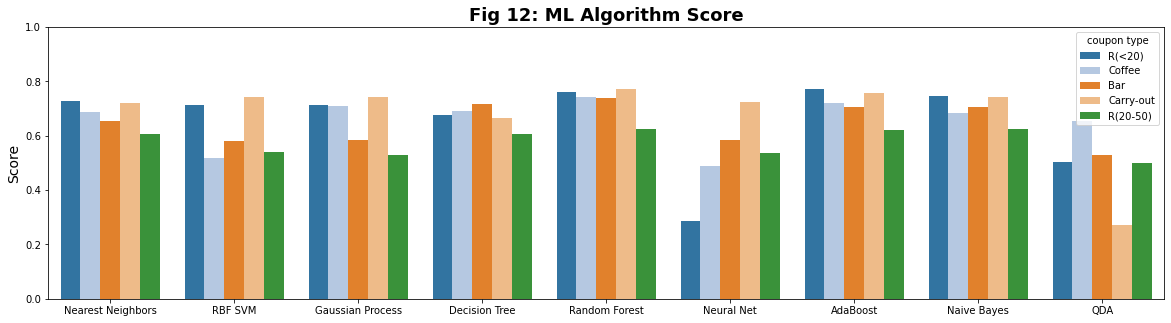

In [25]:
warnings.filterwarnings("ignore")
colors = [plt.cm.tab20(i) for i in range(20)]
fig_12 = plt.figure(figsize=(20,5),facecolor="white")
sns.barplot(data=df_score[["coupon type","classifiers","score"]],\
    x="classifiers",y="score",hue="coupon type",palette=colors)
plt.title("Fig 12: ML Algorithm Score",fontsize=18,fontweight="bold")
plt.xlabel("")
plt.ylabel("Score",fontsize=14)
plt.ylim([0,1])
warnings.resetwarnings()

In [26]:
warnings.filterwarnings("ignore")
random_state = 42
test_size = 0.33

lst_coupon = df_['coupon']
X = df_.loc[:,df_.columns[2:]]
y = df_.loc[:,['accept_coupon']]

# get the index of each coupon
idx_bar = lst_coupon=='Bar'
idx_cof = lst_coupon=='Coffee'
idx_car = lst_coupon=='Carry-out'
idx_r20 = lst_coupon=='R(<20)'
idx_r50 = lst_coupon=='R(20-50)'

# bar restaurant
adbclf_bar = RandomForestClassifier()
Xa = X.loc[idx_bar,:]
ya = y.loc[idx_bar,:]
X_train_bar, X_test_bar, y_train_bar, y_test_bar = train_test_split(Xa, ya, test_size=test_size, random_state=random_state)
adbclf_bar.fit(X_train_bar, y_train_bar)
idx = adbclf_bar.feature_importances_>0
fname_bar = adbclf_bar.feature_names_in_[idx]
rank_bar = pd.DataFrame(zip(fname_bar,adbclf_bar.feature_importances_[idx]),columns=["feature","ranks"])
rank_bar = rank_bar.sort_values(by="ranks",ascending=False).reset_index(drop=True)

# coffee shop
adbclf_cof = RandomForestClassifier()
Xa = X.loc[idx_cof,:]
ya = y.loc[idx_cof,:]
X_train_cof, X_test_cof, y_train_cof, y_test_cof = train_test_split(Xa, ya, test_size=test_size, random_state=random_state)
adbclf_cof.fit(X_train_cof, y_train_cof)
idx = adbclf_cof.feature_importances_>0
fname_cof = adbclf_cof.feature_names_in_[idx]
rank_cof = pd.DataFrame(zip(fname_cof,adbclf_cof.feature_importances_[idx]),columns=["feature","ranks"])
rank_cof = rank_cof.sort_values(by="ranks",ascending=False).reset_index(drop=True)

# carry-out restaurant
adbclf_car = RandomForestClassifier()
Xa = X.loc[idx_car,:]
ya = y.loc[idx_car,:]
X_train_car, X_test_car, y_train_car, y_test_car = train_test_split(Xa, ya, test_size=test_size, random_state=random_state)
adbclf_car.fit(X_train_car, y_train_car)
idx = adbclf_car.feature_importances_>0
fname_car = adbclf_car.feature_names_in_[idx]
rank_car = pd.DataFrame(zip(fname_car,adbclf_car.feature_importances_[idx]),columns=["feature","ranks"])
rank_car = rank_car.sort_values(by="ranks",ascending=False).reset_index(drop=True)

# restaurant price less than $20
adbclf_r20 = AdaBoostClassifier()
Xa = X.loc[idx_r20,:]
ya = y.loc[idx_r20,:]
X_train_r20, X_test_r20, y_train_r20, y_test_r20 = train_test_split(Xa, ya, test_size=test_size, random_state=random_state)
adbclf_r20.fit(X_train_r20, y_train_r20)
idx = adbclf_r20.feature_importances_>0
fname_r20 = adbclf_r20.feature_names_in_[idx]
rank_r20 = pd.DataFrame(zip(fname_r20,adbclf_r20.feature_importances_[idx]),columns=["feature","ranks"])
rank_r20 = rank_r20.sort_values(by="ranks",ascending=False).reset_index(drop=True)

# restaurant price less than $20
adbclf_r50 = DecisionTreeClassifier()
Xa = X.loc[idx_r50,:]
ya = y.loc[idx_r50,:]
X_train_r50, X_test_r50, y_train_r50, y_test_r50 = train_test_split(Xa, ya, test_size=test_size, random_state=random_state)
adbclf_r50.fit(X_train_r50, y_train_r50)
idx = adbclf_r50.feature_importances_>0
fname_r50 = adbclf_r50.feature_names_in_[idx]
rank_r50 = pd.DataFrame(zip(fname_r50,adbclf_r50.feature_importances_[idx]),columns=["feature","ranks"])
rank_r50 = rank_r50.sort_values(by="ranks",ascending=False).reset_index(drop=True)

warnings.resetwarnings()

#### Confusion Matrix on each coupon type with AdaBoost classifier
In this section, we will examine the confusion matrices and see how they perform in each group in each domain. Although all of the models perform well, there are still some areas that need improvement.

Both categories, Bar Restaurant and Restaurant b/w $20-$50, have low true positive rate. Ideally, we want to maxizmize this area.

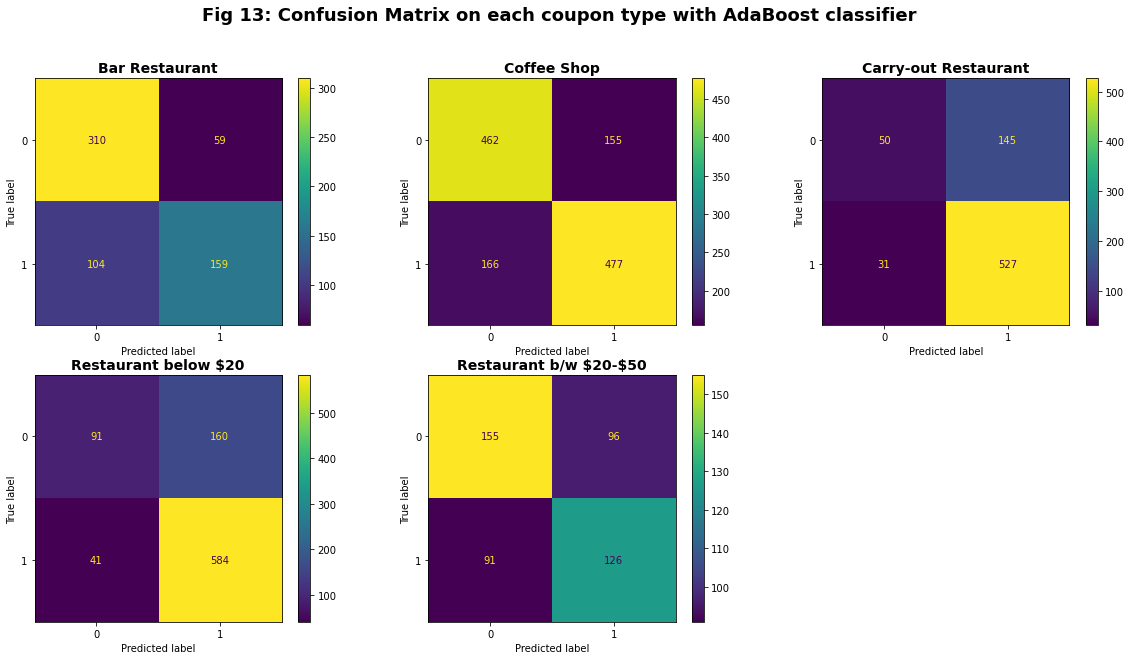

In [27]:
warnings.filterwarnings("ignore")
fig_13 = plt.figure(figsize=(20,10),facecolor="white")
plt.suptitle("Fig 13: Confusion Matrix on each coupon type with AdaBoost classifier", fontsize=18,fontweight="bold")
fig_13.add_subplot(2,3,1)
plot_confusion_matrix(adbclf_bar,X_test_bar,y_test_bar,ax=plt.gca())
plt.title("Bar Restaurant",fontsize=14,fontweight="bold")
fig_13.add_subplot(2,3,2)
plot_confusion_matrix(adbclf_cof,X_test_cof,y_test_cof,ax=plt.gca())
plt.title("Coffee Shop",fontsize=14,fontweight="bold")
fig_13.add_subplot(2,3,3)
plot_confusion_matrix(adbclf_car,X_test_car,y_test_car,ax=plt.gca())
plt.title("Carry-out Restaurant",fontsize=14,fontweight="bold")
fig_13.add_subplot(2,3,4)
plot_confusion_matrix(adbclf_r20,X_test_r20,y_test_r20,ax=plt.gca())
plt.title(r"Restaurant below \$20",fontsize=14,fontweight="bold")
fig_13.add_subplot(2,3,5)
plot_confusion_matrix(adbclf_r50,X_test_r50,y_test_r50,ax=plt.gca())
plt.title(r"Restaurant b/w \$20-\$50",fontsize=14,fontweight="bold")
warnings.resetwarnings()

#### Feature Importances
In this section, we will examine the importance of features in each coupon type. We will pick out the top 5 features in the list and understand why they are key factors. As we have seen, the top key factors for each coupon type include how often drivers visit each store.

Another interesting observation is that most of the coupon types include income as a key factor. This is very interesting because it tells us that an individual's income is what determines whether or not a person accepts coupons.

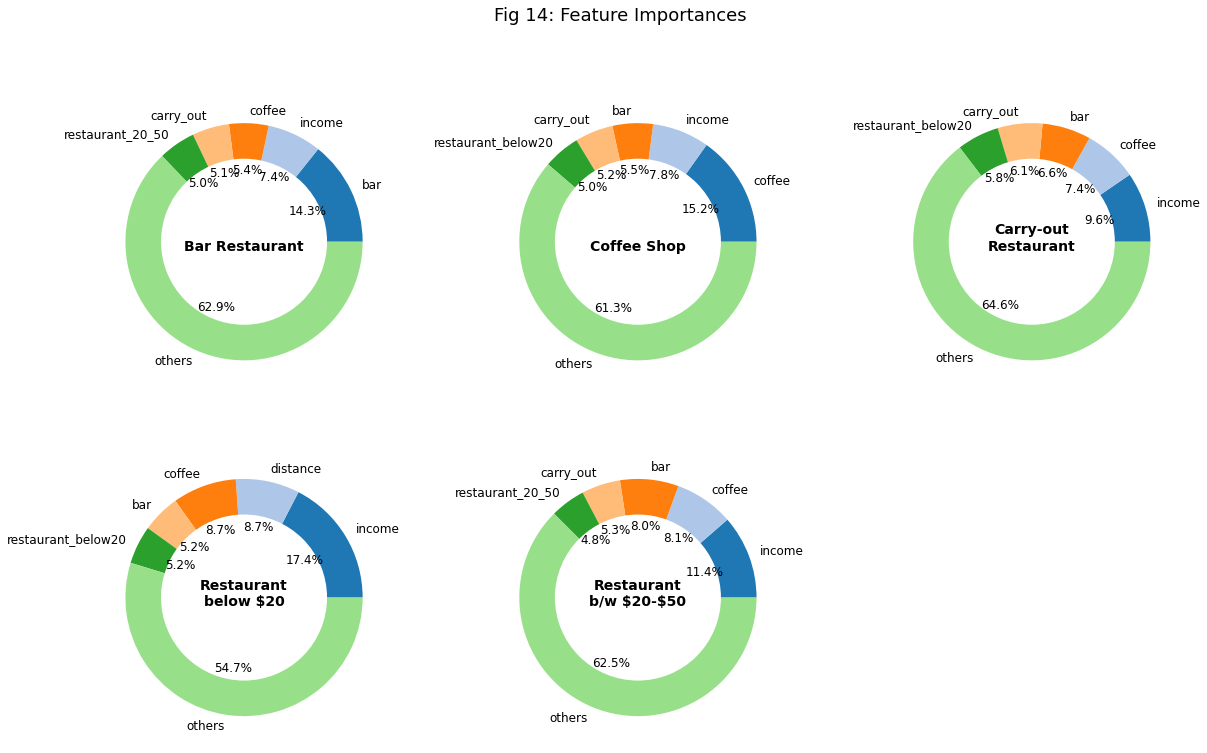

In [28]:
fig_14 = plt.figure(figsize=(20,12),facecolor="white")
plt.suptitle("Fig 14: Feature Importances", fontsize=18)

fig_14.add_subplot(2,3,1)
tmp = rank_bar.loc[0:5,["feature","ranks"]]
tmp.loc[5,"feature"] = "others"
tmp.loc[5,"ranks"] = np.sum(rank_bar.loc[5:,"ranks"])
tmp.plot.pie(ax=plt.gca(),y='ranks',\
    labels=tmp['feature'],
    autopct="%1.1f%%",
    colors=colors,
    fontsize=12)
plt.title("Bar Restaurant",fontsize=14,fontweight="bold",y=0.45)
plt.ylabel("")
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))
plt.legend().remove()

fig_14.add_subplot(2,3,2)
tmp = rank_cof.loc[0:5,["feature","ranks"]]
tmp.loc[5,"feature"] = "others"
tmp.loc[5,"ranks"] = np.sum(rank_bar.loc[5:,"ranks"])
tmp.plot.pie(ax=plt.gca(),y='ranks',\
    labels=tmp['feature'],
    autopct="%1.1f%%",
    colors=colors,
    fontsize=12)
plt.title("Coffee Shop",fontsize=14,fontweight="bold",y=0.45)
plt.ylabel("")
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))
plt.legend().remove()

fig_14.add_subplot(2,3,3)
tmp = rank_car.loc[0:5,["feature","ranks"]]
tmp.loc[5,"feature"] = "others"
tmp.loc[5,"ranks"] = np.sum(rank_bar.loc[5:,"ranks"])
tmp.plot.pie(ax=plt.gca(),y='ranks',\
    labels=tmp['feature'],
    autopct="%1.1f%%",
    colors=colors,
    fontsize=12)
plt.title("Carry-out\nRestaurant",fontsize=14,fontweight="bold",y=0.45)
plt.ylabel("")
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))
plt.legend().remove()

fig_14.add_subplot(2,3,4)
tmp = rank_r20.loc[0:5,["feature","ranks"]]
tmp.loc[5,"feature"] = "others"
tmp.loc[5,"ranks"] = np.sum(rank_bar.loc[5:,"ranks"])
tmp.plot.pie(ax=plt.gca(),y='ranks',\
    labels=tmp['feature'],
    autopct="%1.1f%%",
    colors=colors,
    fontsize=12)
plt.title("Restaurant\n"+r"below \$20",fontsize=14,fontweight="bold",y=0.45)
plt.ylabel("")
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))
plt.legend().remove()


fig_14.add_subplot(2,3,5)
tmp = rank_r50.loc[0:5,["feature","ranks"]]
tmp.loc[5,"feature"] = "others"
tmp.loc[5,"ranks"] = np.sum(rank_bar.loc[5:,"ranks"])
tmp.plot.pie(ax=plt.gca(),y='ranks',\
    labels=tmp['feature'],
    autopct="%1.1f%%",
    colors=colors,
    fontsize=12)
plt.title("Restaurant\n"+r"b/w \$20-\$50",fontsize=14,fontweight="bold",y=0.45)
plt.ylabel("")
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))
plt.legend().remove()

### Conclusion
We have created machine learning models with an accuracy rate of over 0.70. More importantly, we understand the key factors that determine whether a driver will accept a coupon. A driver's primary motivation for accepting a coupon is whether the coupon is directly applicable to their needs. As we have seen, the primary key factors for each coupon type include the frequency with which drivers visit each store. Another key factor was revenue, which we also expected.

In future observations, I will study the distribution of each key factor and understand the range of these factors that determine the acceptance rate. In addition, I need to improve the accuracy rate by increasing the true positive rate. Since our main concern is whether we are issuing the right coupons to drivers, I believe that the true positive rate is more important than the true negative rate.